# Problem Statement
An education company named X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. The company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc.Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

## Business Goal

X Education need help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company need help in buildig a model wherein a lead score is assigned to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Analysing and Understanding the Data

In [1]:
#Importing the required libraries

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import sklearn libraries
import sklearn
from sklearn.model_selection import train_test_split

#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

#import stats library
from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
# Importing DataSet
lead = pd.read_csv(r"C:\Users\Admin\Downloads\Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead.shape

(9240, 37)

In [4]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning

In [7]:
#Handeling the 'Select' value present in the categorical variables. It might be non-manadatory fields where customer didnot select any values. Hence converting the 'Select' as NaN.

lead = lead.replace('Select',np.nan)

In [8]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# percentage of null values in each column

missing_percent = round(100*(lead.isnull().sum()/len(lead.index)), 2).sort_values(ascending=False)
print(missing_percent)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

### Assuming threshold of missing values as 40%, drop the columns where the threshold of missing values is more than 40%

In [10]:
cols = ['Lead Quality','How did you hear about X Education','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']
lead.drop(cols, axis = 1, inplace = True)

In [11]:
missing_percent = round(100*(lead.isnull().sum()/len(lead.index)), 2).sort_values(ascending=False)
print(missing_percent)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [12]:
# Dropping Prospect ID and Lead Number as they are not required for regression.
lead.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [13]:
lead.shape

(9240, 28)

In [14]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

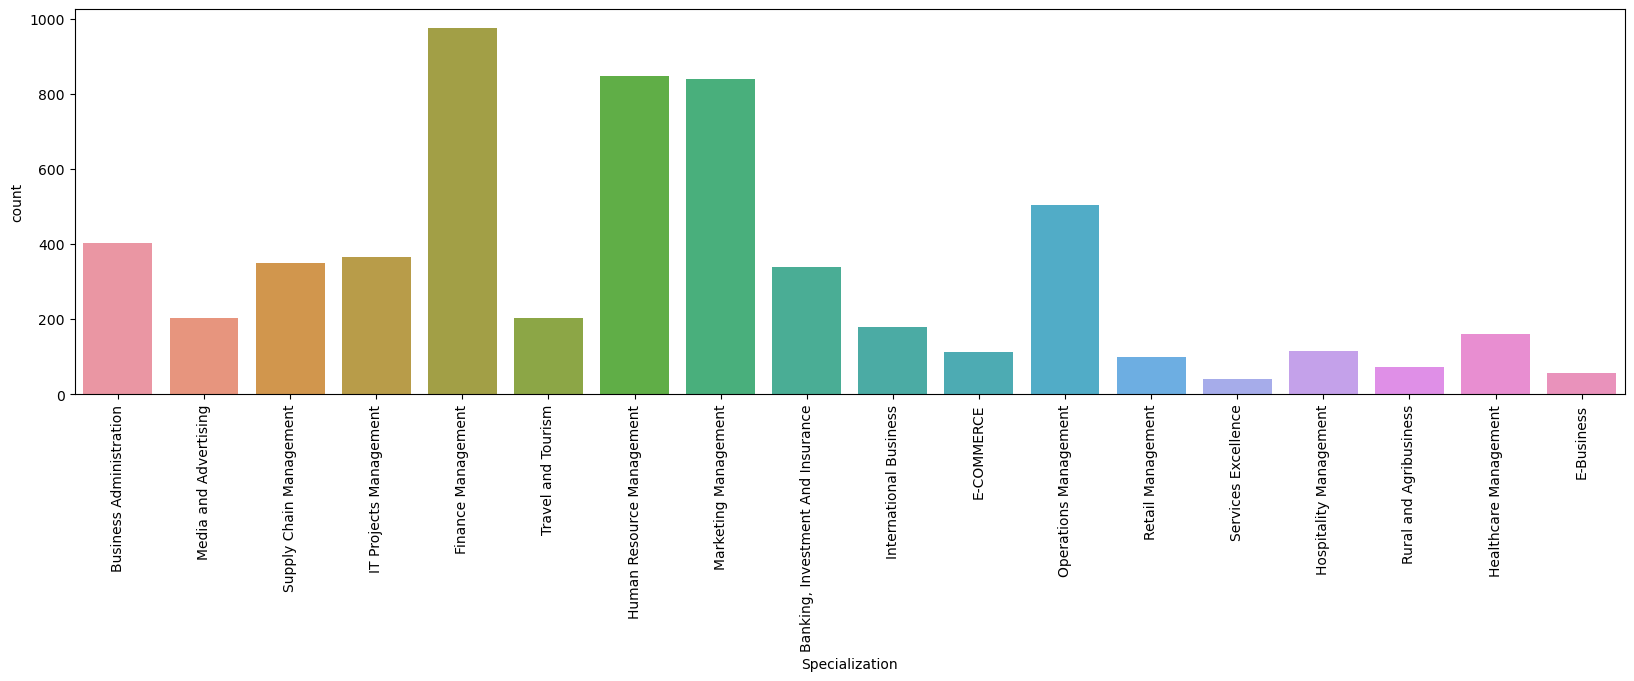

In [15]:
#Visualizing the data to get more insight
plt.figure(figsize=(20,5))
sns.countplot(x='Specialization',data=lead)
plt.xticks(rotation=90)

In [16]:
#Probably many customers dont have specialization or they didn't find their specialization option in selection. Hence setting the null as others.
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')

In [17]:
lead['Specialization'].value_counts()

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

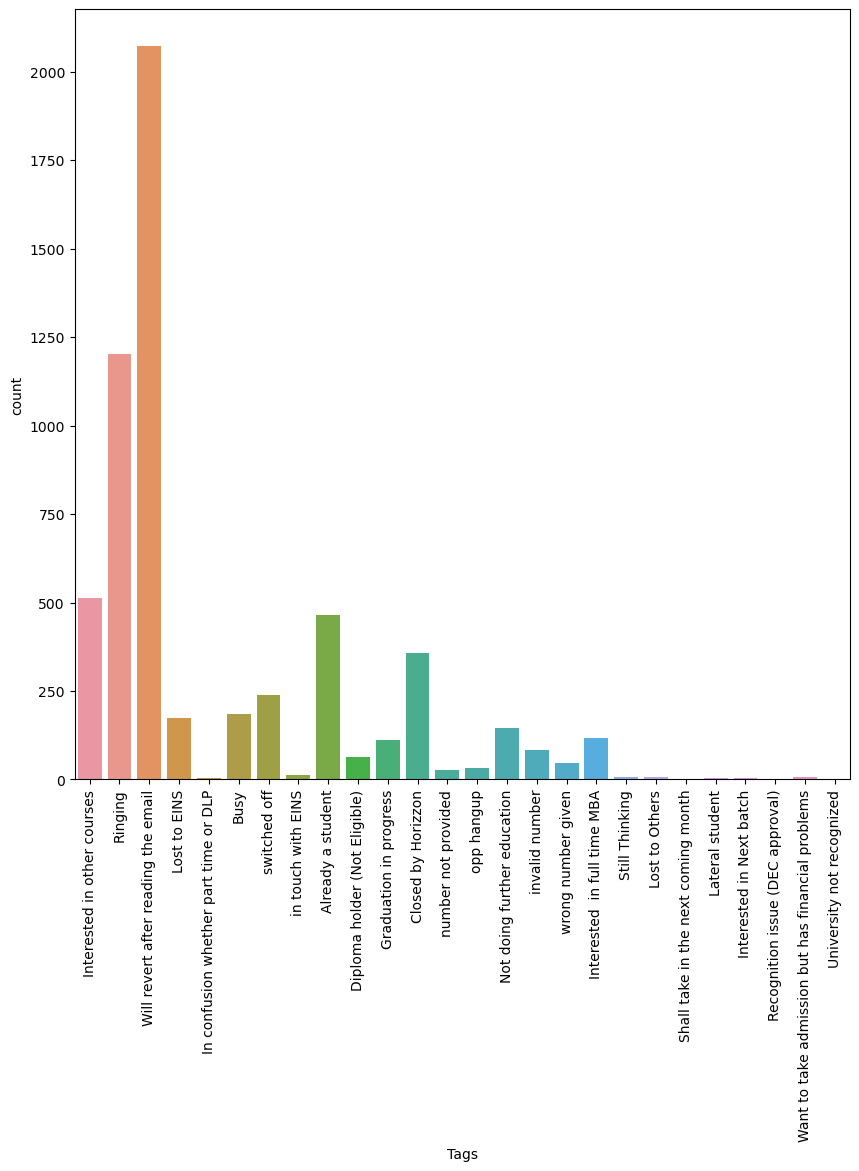

In [18]:
# Visuizing tag column
plt.figure(figsize=(10,10))
sns.countplot(x='Tags',data=lead)
plt.xticks(rotation=90)

In [19]:
# Since most values have 'Will revert after reading the email' , so we can impute missing values in this column with this value
lead['Tags']=lead['Tags'].replace(np.nan,'Will revert after reading the email')

In [20]:
lead["Tags"].value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

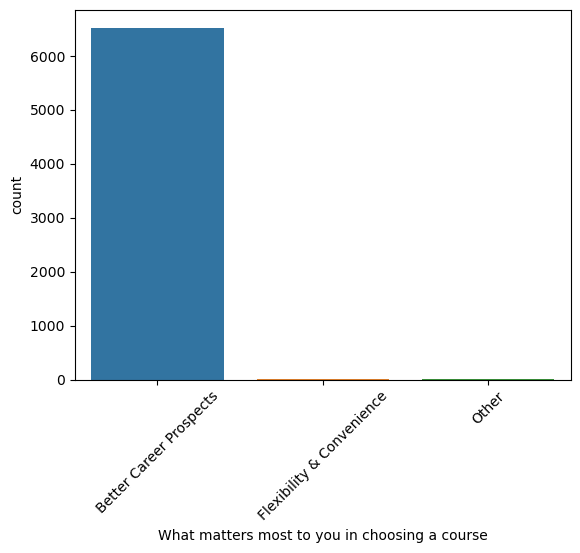

In [21]:
#Visualizing "What matters most to you in choosing a course" column
sns.countplot(x='What matters most to you in choosing a course',data=lead)
plt.xticks(rotation=45)

In [22]:
round(lead['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [23]:
#Since everyone select the same option for this field value, so we can drop it.
lead=lead.drop('What matters most to you in choosing a course',axis=1)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

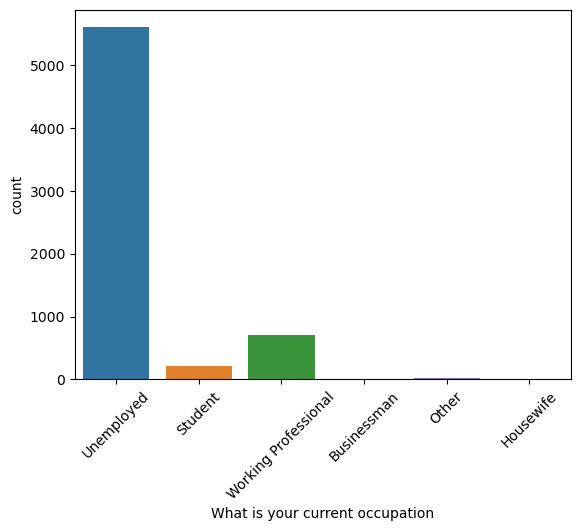

In [24]:
# Visualizing the column "What is your current occupation"
sns.countplot(x='What is your current occupation',data=lead)
plt.xticks(rotation=45)

In [25]:
lead["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
#Since most values are 'Unemployed', so we can impute missing values as 'Unemployed'
lead['What is your current occupation']=lead['What is your current occupation'].replace(np.nan,'Unemployed')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

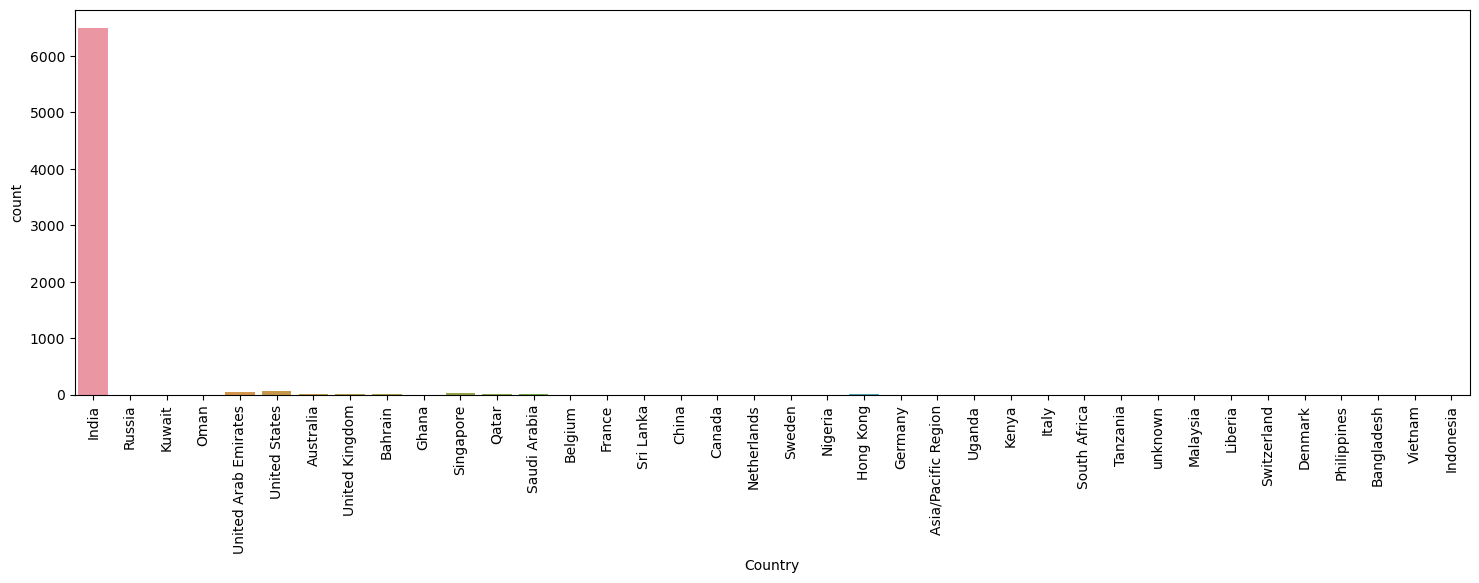

In [27]:
#Visualizing 'Country' column
plt.figure(figsize=(18,5))
sns.countplot(x='Country',data=lead)
plt.xticks(rotation=90)

In [28]:
lead["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [29]:
#Since most customer have selected 'India', so we can impute the empty values as 'India'
lead["Country"]=lead["Country"].replace(np.nan,'India')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

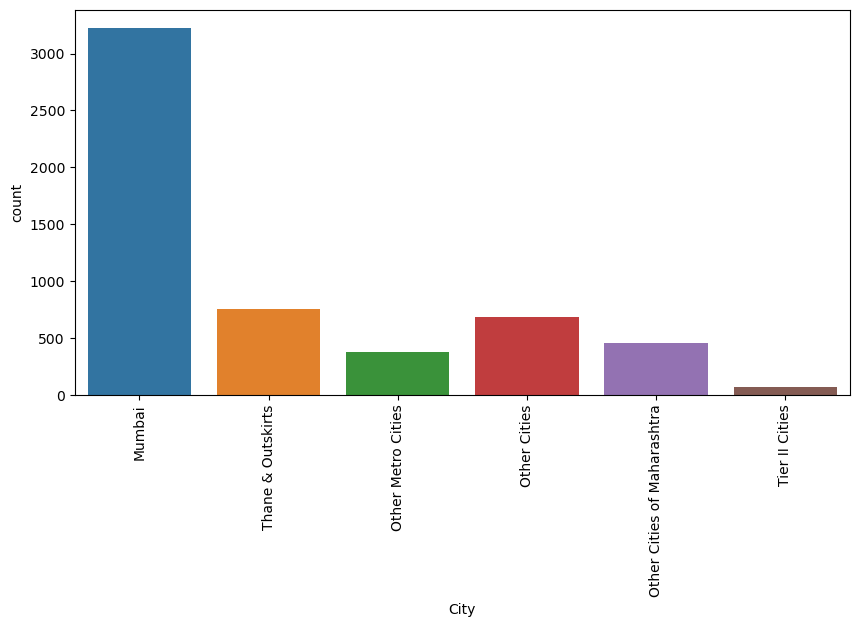

In [30]:
#Visualizing 'City' column
plt.figure(figsize=(10,5))
sns.countplot(x='City',data=lead)
plt.xticks(rotation=90)

In [31]:
lead["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [32]:
#Percentage of choice in 'City' column.
round(lead['City'].value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

In [33]:
#Since most selected value is 'Mumbai'. Hence impute the missing values as 'Mumbai'
lead.City=lead.City.replace(np.nan,'Mumbai')

In [34]:
missing_percent = round(100*(lead.isnull().sum()/len(lead.index)), 2).sort_values(ascending=False)
print(missing_percent)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
Lead Source                                 0.39
Lead Origin                                 0.00
Newspaper                                   0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
City                                        0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Tags                                        0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Magazine                                    0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
What is your current occupation             0.00
Specialization      

In [35]:
# Since other columns have less than 2% of missing values, so we cna drop those rows
lead.dropna(inplace = True)

In [36]:
round(100*(lead.isnull().sum()/len(lead.index)), 2).sort_values(ascending=False)

Lead Origin                                 0.0
Newspaper Article                           0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Magazine                                    0.0
Lead Source                                 0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Country                                     0.0
Last Activity                               0.0
Page Views Per Visit                    

In [37]:
lead.shape

(9074, 27)

In [38]:
# Now we dont have any missing vaues in any column. Lets see the percentage of row retained
(len(lead.index)/9240)*100

98.2034632034632

#### We have retained 98% of the rows after cleaning the data .

## Exploratory Data Analysis

### Univariate Analysis and Bivariate Analysis

In [39]:
# Considering the Target variable "Converted"
lead.Converted.value_counts(normalize = True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

In [40]:
# Validating the conversion rate
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

37.85541106458012

### Inference - The Lead conversion rate is around 38%

In [41]:
# Looking at Country column
lead.Country.value_counts()

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [42]:
#Since most customers are from India, so seggerating the coutries into India and Outside India for better analysis
a = list(set([x for x in lead.Country]))
a = [x for x in a if x not in ["India"]]
lead["Country"] = lead["Country"].replace(a , "Outside India")

In [43]:
lead.Country.value_counts()

India            8787
Outside India     287
Name: Country, dtype: int64

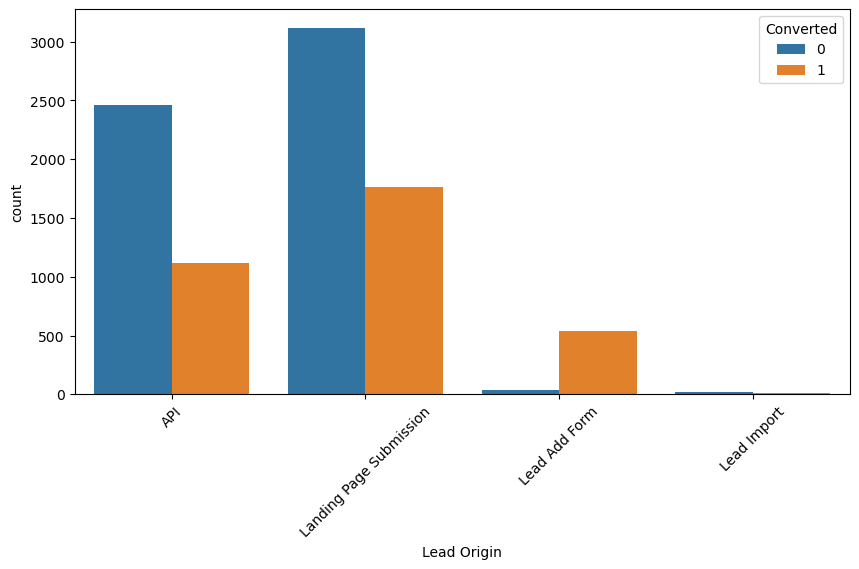

In [44]:
# Considering 'Lead Origin' column
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead)
plt.xticks(rotation = 45)
plt.show()

In [45]:
# Percentage conversion for each Origin
lead.groupby('Lead Origin')['Converted'].mean() * 100

Lead Origin
API                        31.162661
Landing Page Submission    36.171955
Lead Add Form              93.631670
Lead Import                30.000000
Name: Converted, dtype: float64

### Inference - 
1. 'API' and 'Landing Page Submission' have a conversion rate of 30-36%, but there is a considerable amount of customer originated from this.
2. 'Lead Add Form' have a conversion rate of more than 90%, but the originated customer from this is less.
3. 'Lead Import' has a very low count and a low conversion rate as well.

To improve the overall lead conversion rate, we need to focus more on improving the lead conversion from "API" and "Landing Page Submission" origin and generate more leads from "Lead Add Form".

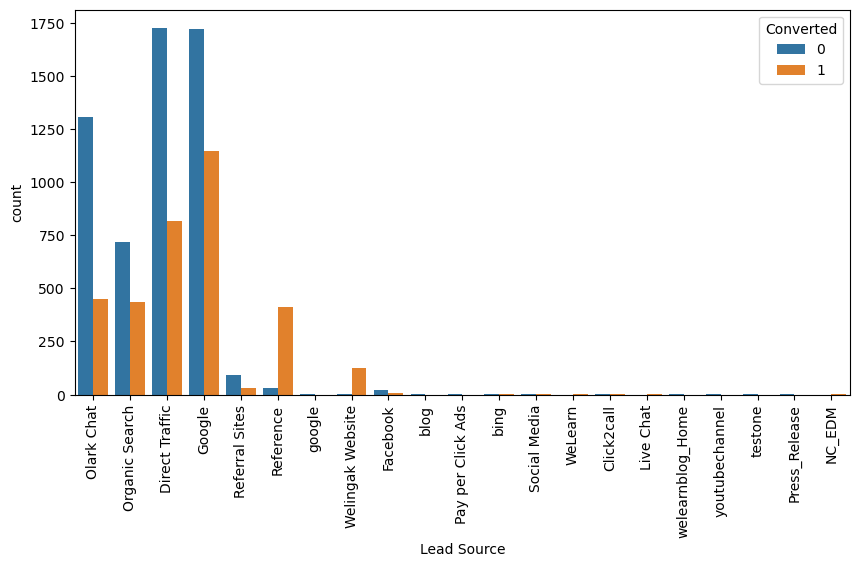

In [46]:
# Considering the 'Lead Source' column
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [47]:
# Replacing google with " Google"
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')

In [48]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads','Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

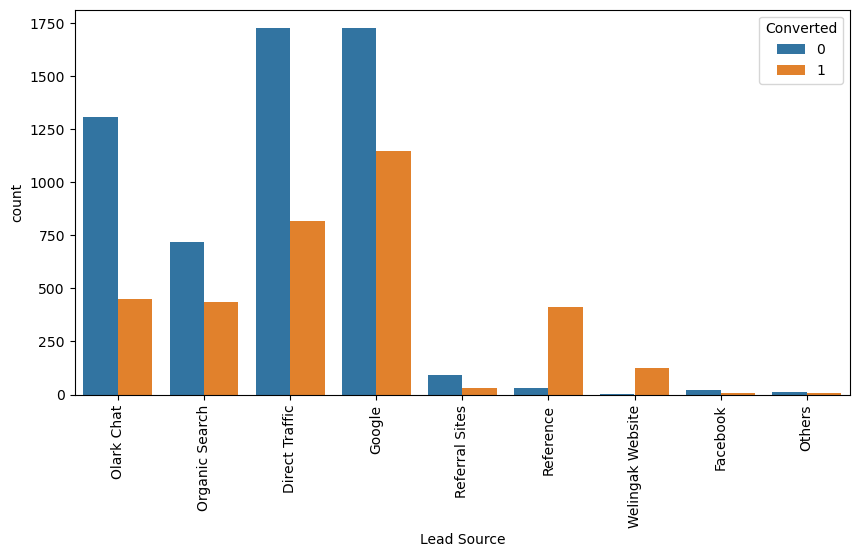

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [50]:
#Percentage of conversion for each Source
lead.groupby('Lead Source')['Converted'].mean() * 100

Lead Source
Direct Traffic      32.166732
Facebook            29.032258
Google              39.923425
Olark Chat          25.556189
Organic Search      37.781629
Others              39.130435
Reference           92.550790
Referral Sites      24.800000
Welingak Website    98.449612
Name: Converted, dtype: float64

In [51]:
lead["Lead Source"].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                23
Name: Lead Source, dtype: int64

### Inference -
1. The top three lead sources are Google, Direct Traffic, and Olark Chat.
2. Conversion Rate of reference leads and leads through welingak website is high.

To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads source. Focus on generating more leads from reference and welingak website.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

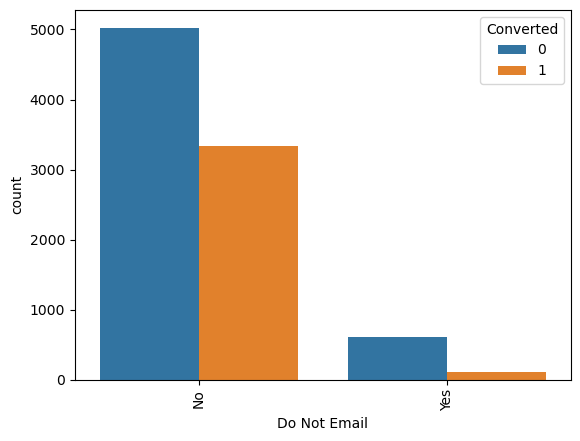

In [52]:
#Considering 'Do Not Email' column
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead)
plt.xticks(rotation = 90)

In [53]:
# Percentage of conversion for each Response
lead.groupby('Do Not Email')['Converted'].mean() * 100

Do Not Email
No     39.854032
Yes    14.525140
Name: Converted, dtype: float64

In [54]:
lead["Do Not Email"].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

### Inference - 
The conversion rate for People who do not want an email is significantly lower than those who do want an Email

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

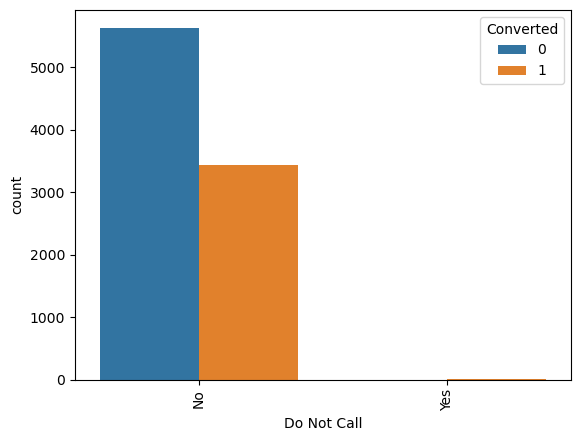

In [55]:
#Considering 'Do Not Call' column
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead)
plt.xticks(rotation = 90)

In [56]:
lead["Do Not Call"].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

### Inference - This coulumn is highly skewed, so can be removed

In [57]:
lead.drop("Do Not Call", axis=1)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,India,Others,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,India,Others,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,Outside India,IT Projects Management,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,wrong number given,No,No,Mumbai,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,No,No,No,No,No,No,No,No,invalid number,No,No,Mumbai,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Other Metro Cities,No,No,SMS Sent


In [58]:
#Considering 'Total Visit' column
lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: >

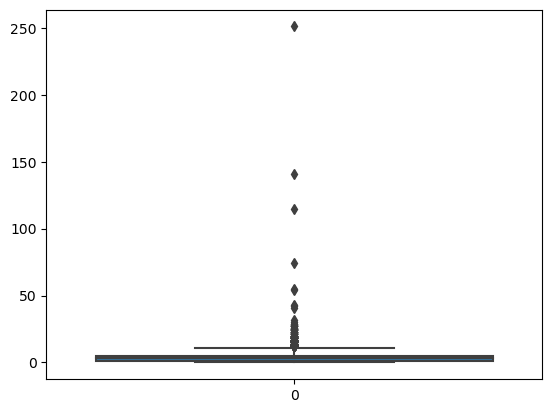

In [59]:
sns.boxplot(lead['TotalVisits'],orient='vert')

#### Since there are more outliers in the data. We will cap the outliers to 95% value for analysis

In [60]:
percentiles = lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead['TotalVisits'][lead['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: >

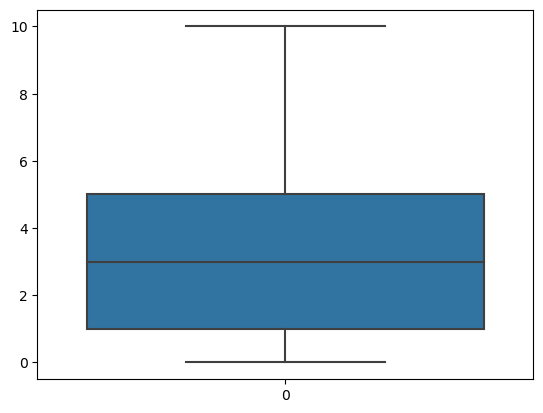

In [61]:
sns.boxplot(lead['TotalVisits'],orient='vert')

<Axes: xlabel='Converted', ylabel='TotalVisits'>

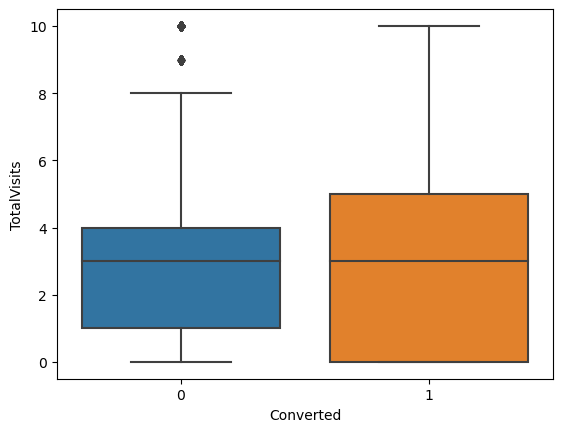

In [62]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)

### Inference -
Median for both converted and not converted leads are the same.Hence we cannot conclude anything based of Total Visits.

In [63]:
#Considering 'Total Time Spent on Website' column
lead["Total Time Spent on Website"].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: >

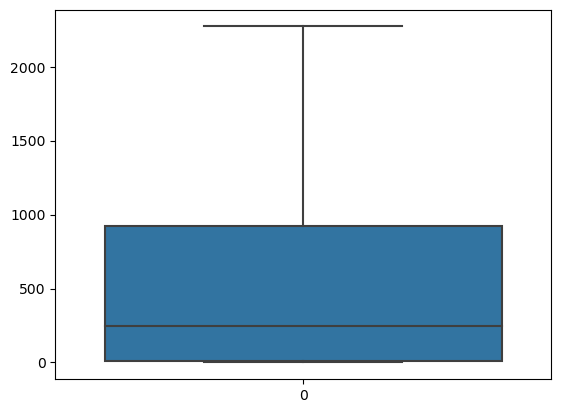

In [64]:
sns.boxplot(lead['Total Time Spent on Website'],orient='vert')

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

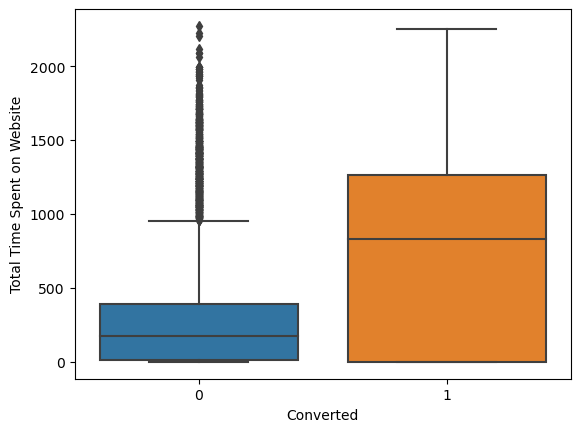

In [65]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead)

### Inference -
Leads who are spending more time on the website are more likely to be converted.
Website should be made more engaging to make leads spend more time.

In [66]:
#Considering 'Page Views Per Visit' column
lead['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: >

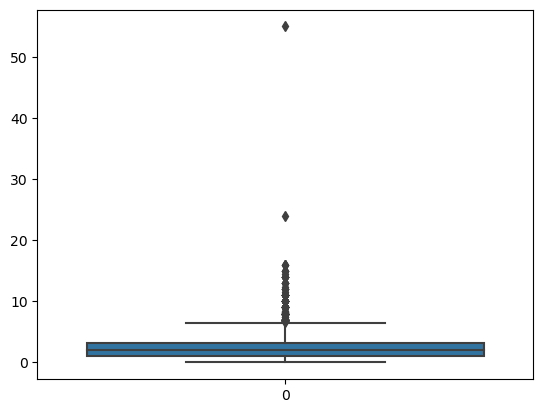

In [67]:
sns.boxplot(lead['Page Views Per Visit'],orient='vert')

In [68]:
#More outliers in the data, so capping the outliers to 95% value for analysis
percentiles = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: >

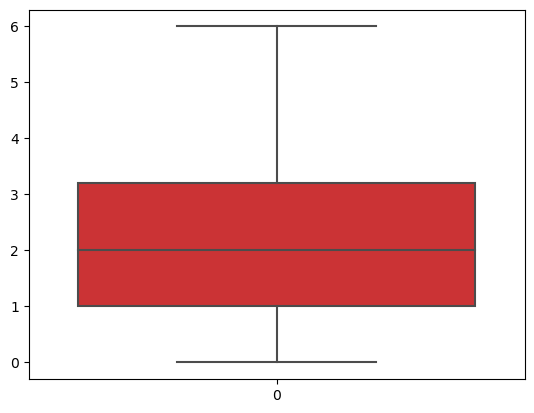

In [69]:
sns.boxplot(lead['Page Views Per Visit'],palette='Set1')

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

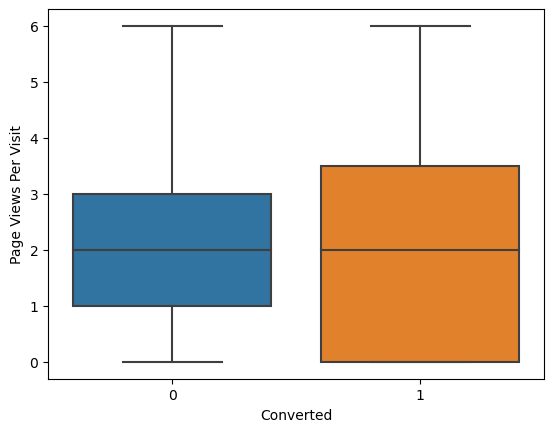

In [70]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead)

### Inference -
Median for both converted and not converted leads are the same.Hence we cannot conclude anything based of 'Page Views Per Visit'.

In [71]:
#Considering 'Last Activity' column
lead['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

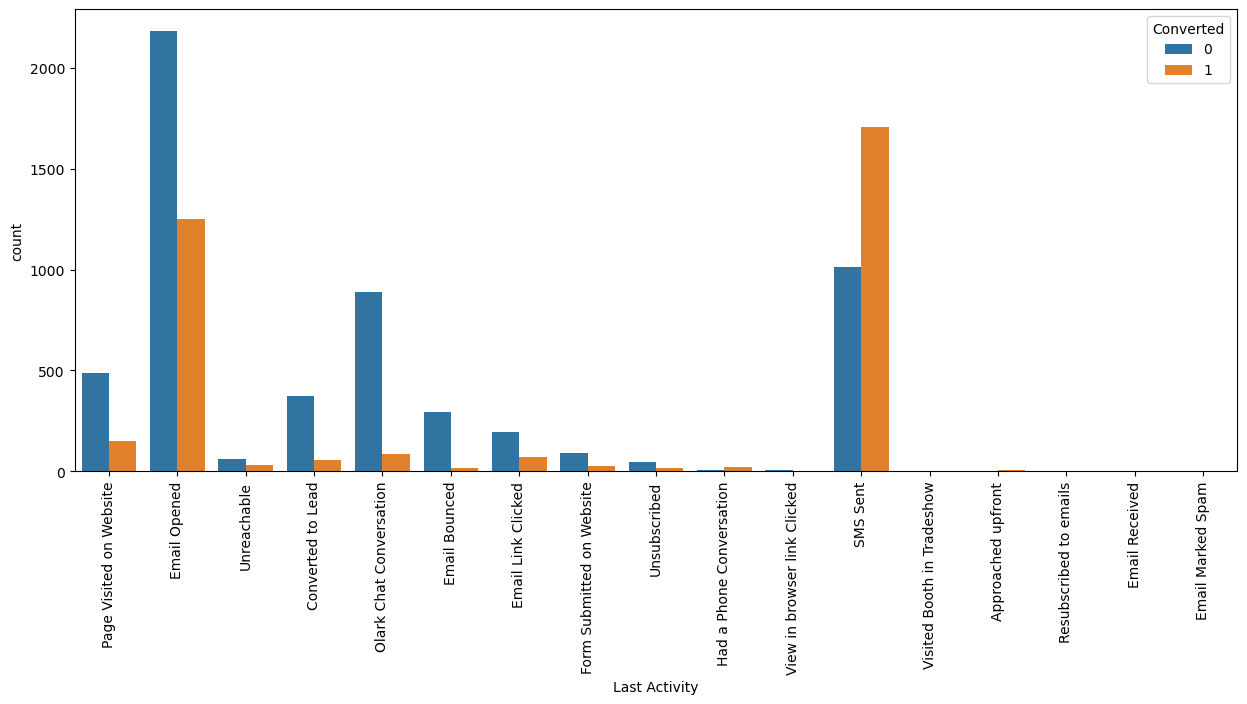

In [72]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [73]:
lead["Last Activity"].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [74]:
#Clubbing the last activities to "Other_Activity" which are having less data.
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                    'Visited Booth in Tradeshow', 'Approached upfront',
                                                    'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')


In [75]:
lead.groupby('Last Activity')['Converted'].mean() * 100

Last Activity
Converted to Lead            12.616822
Email Bounced                 5.128205
Email Link Clicked           27.340824
Email Opened                 36.421911
Form Submitted on Website    24.137931
Olark Chat Conversation       8.641975
Other_Activity               73.809524
Page Visited on Website      23.593750
SMS Sent                     62.776141
Unreachable                  32.222222
Unsubscribed                 23.728814
Name: Converted, dtype: float64

In [76]:
lead["Last Activity"].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   59
Other_Activity                 42
Name: Last Activity, dtype: int64

### Inference - 
1.Email Opened and SMS Sent are the most common last activities before conversion.

2.Other_Activity has the lowest conversion rate among all last activities.

3.Email Link Clicked, Form Submitted on Website, and Page Visited on Website have moderate conversion rates.

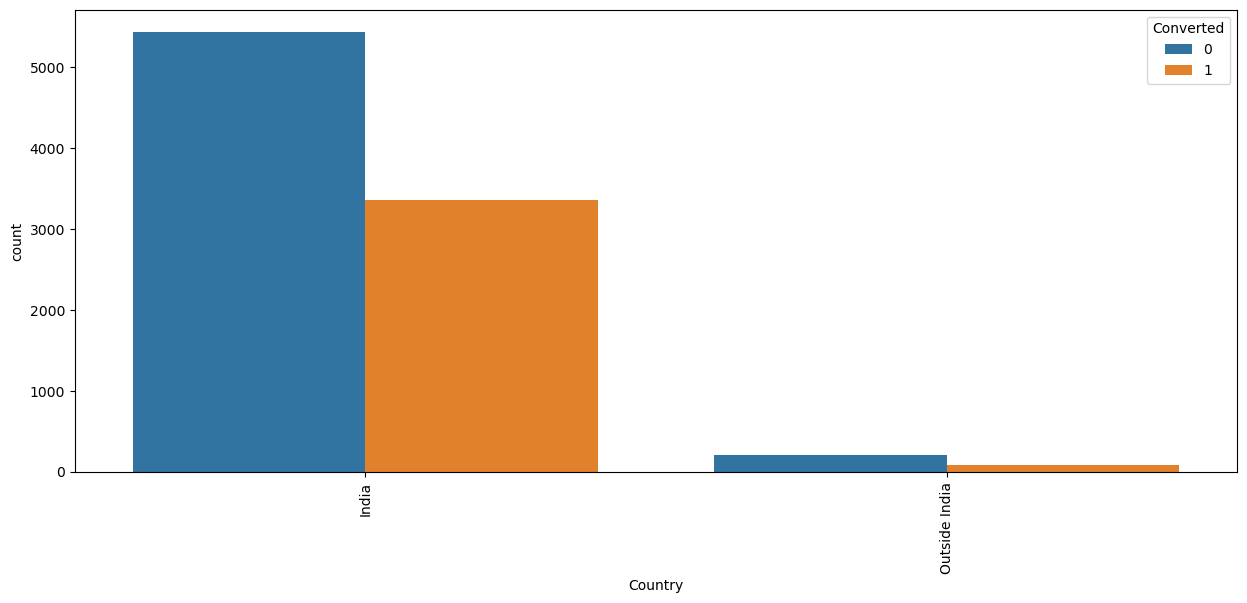

In [77]:
#Considering the 'Country' column
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

### Inference -
Most of the leads are from India. No other Inference can be drawn.

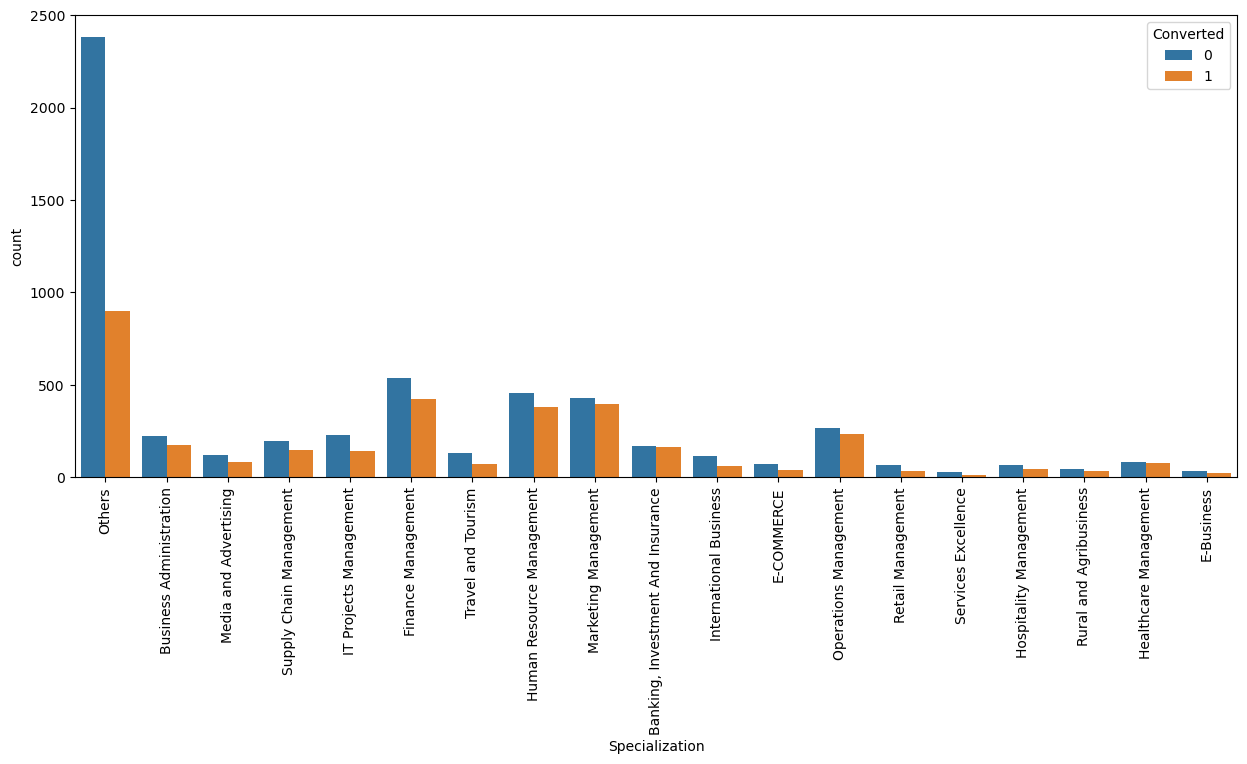

In [78]:
#Considering the 'Specialization' column
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [79]:
lead.groupby('Specialization')['Converted'].mean() * 100

Specialization
Banking, Investment And Insurance    48.955224
Business Administration              43.859649
E-Business                           36.842105
E-COMMERCE                           35.135135
Finance Management                   44.004171
Healthcare Management                48.717949
Hospitality Management               40.540541
Human Resource Management            45.400239
IT Projects Management               38.251366
International Business               35.227273
Marketing Management                 48.238153
Media and Advertising                41.584158
Operations Management                46.893788
Others                               27.452773
Retail Management                    34.000000
Rural and Agribusiness               42.465753
Services Excellence                  27.500000
Supply Chain Management              42.774566
Travel and Tourism                   35.148515
Name: Converted, dtype: float64

### Inference:
    1. All specializations have a conversion rate in between 30-50%
    2. Focus can be given to those specialistion for those whose conversion rate is greater than 40%

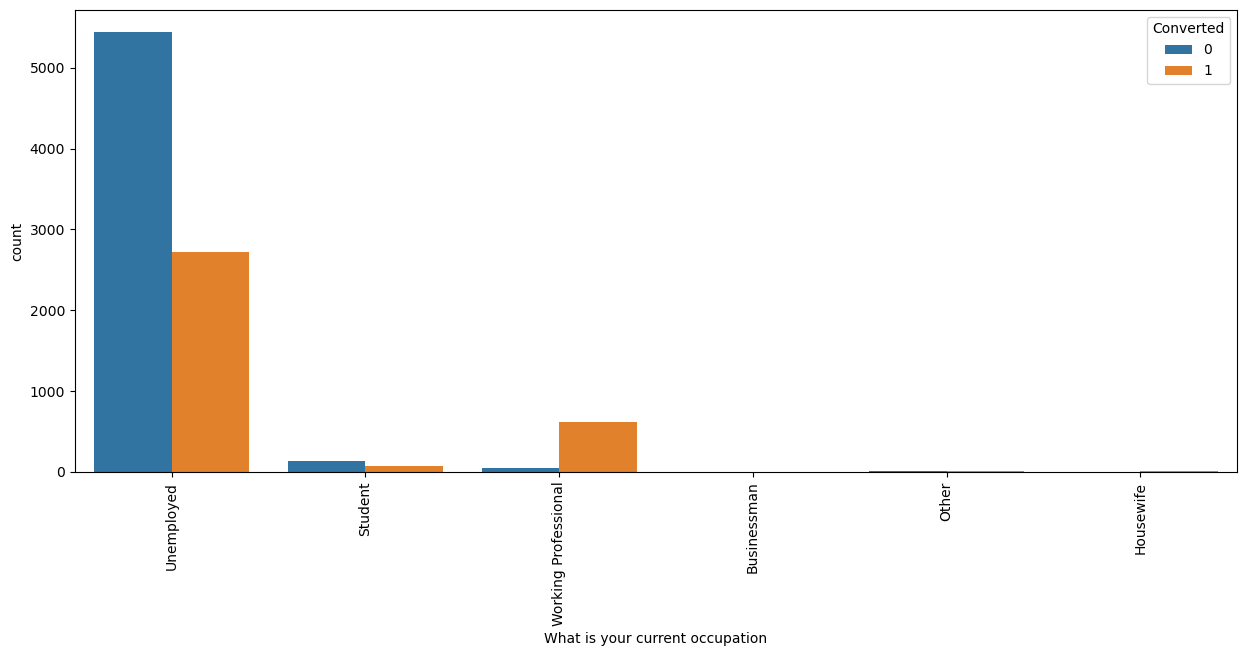

In [80]:
#Considering 'What is your current occupation' column
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [81]:
lead.groupby('What is your current occupation')['Converted'].mean() * 100

What is your current occupation
Businessman              62.500000
Housewife               100.000000
Other                    60.000000
Student                  35.922330
Unemployed               33.288393
Working Professional     91.875923
Name: Converted, dtype: float64

In [82]:
lead["What is your current occupation"].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

### Inference - 
Most responses are from the Unemployed Category, however their conversion rate is around 35%
Working Professional and Housewives have low count but high conversion rates

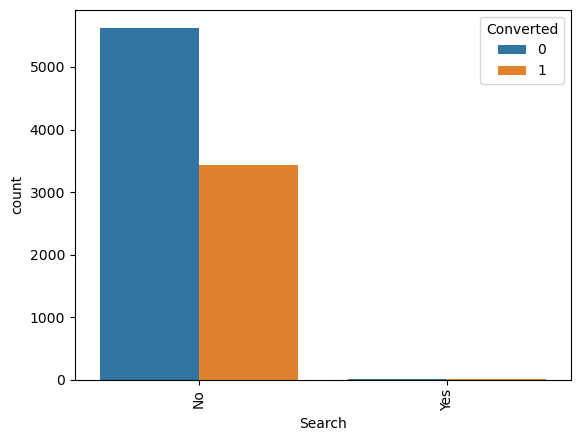

In [83]:
#Considering the 'Search' column
sns.countplot(x = "Search", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [84]:
lead["Search"].value_counts(normalize = True)

No     0.998457
Yes    0.001543
Name: Search, dtype: float64

### Inference -
Most entries are 'No', hence no inference can be made.

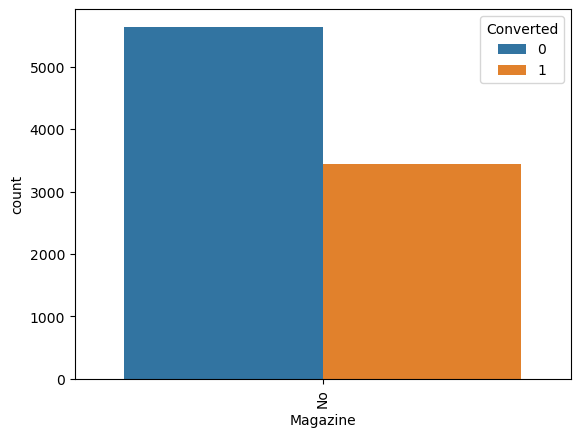

In [85]:
#Considering 'Magazine' column
sns.countplot(x = "Magazine", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [86]:
lead["Magazine"].value_counts()

No    9074
Name: Magazine, dtype: int64

### Inference - 
No Inference can be made from this column.

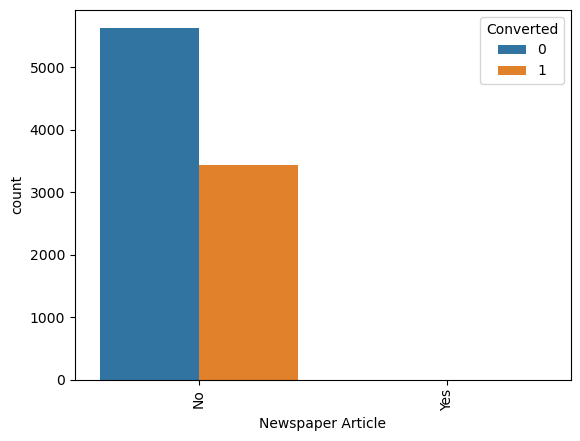

In [87]:
#Considering 'Newspaper Article' column
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [88]:
lead["Newspaper Article"].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

### Inference - 
Most entries are 'No'. No Inference can be drawn with this parameter.

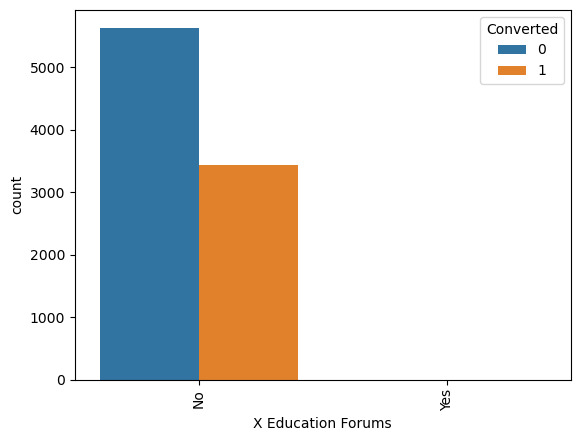

In [89]:
#Considering 'X Education Forums' column
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [90]:
lead["X Education Forums"].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

### Inference - 
Most entries are 'No', hence no Inference can be made from this column.

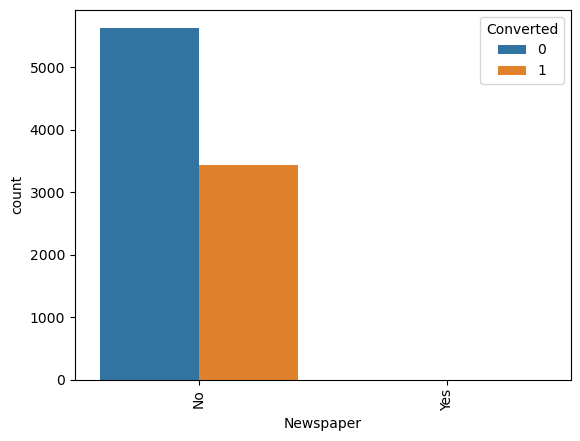

In [91]:
#Considering the 'Newspaper' column
sns.countplot(x = "Newspaper", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [92]:
lead["Newspaper"].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

### Inference - 
Most entries are 'No', hence no Inference can be made from this column.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

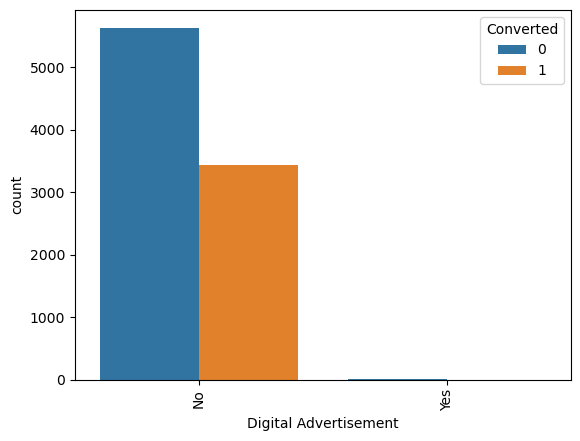

In [93]:
#Considering the 'Digital Advertisement' column
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead)
plt.xticks(rotation = 90)

### Inference - 
Most entries are 'No', hence no Inference can be made from this column.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

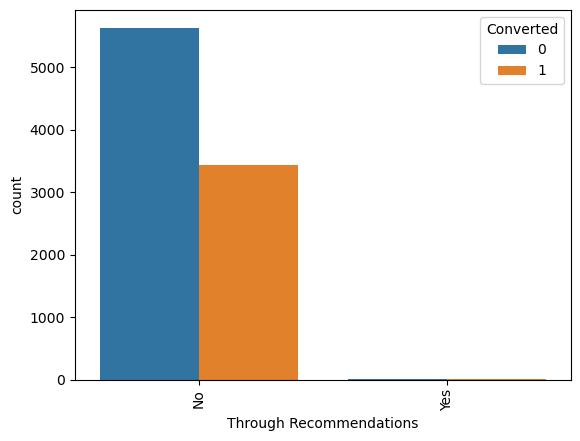

In [94]:
#Considering the 'Through Recommendations' column
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead)
plt.xticks(rotation = 90)

In [95]:
lead["Through Recommendations"].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

### Inference - 
Most entries are 'No', hence no Inference can be made from this column.

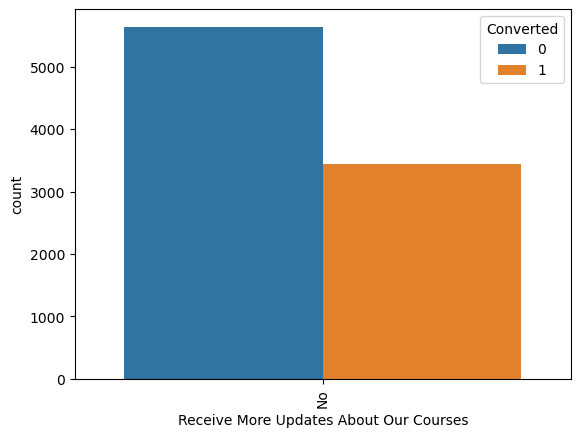

In [96]:
#Considering 'Receive More Updates About Our Courses' column
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [97]:
lead["Receive More Updates About Our Courses"].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

### Inference - 
All the entries have response as 'No', hence no inference can be made from this column.

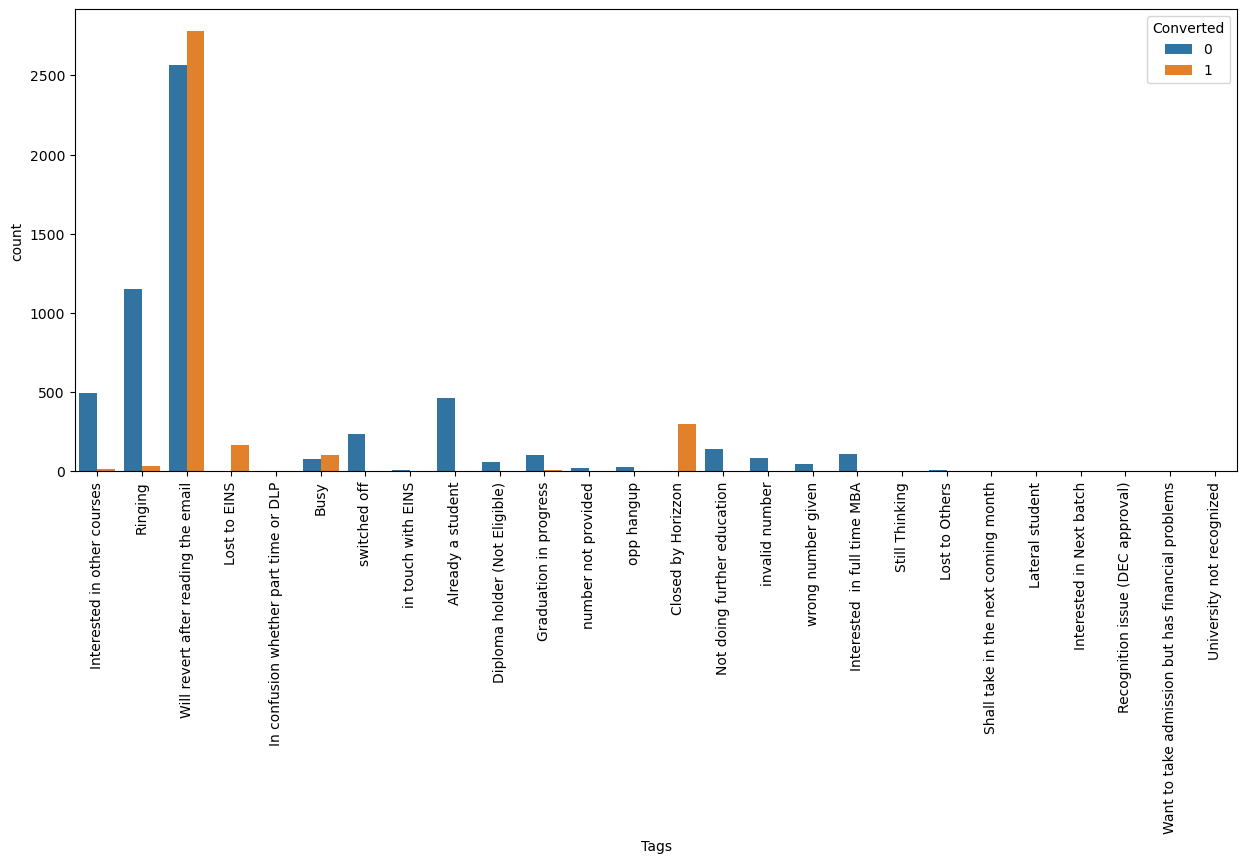

In [98]:
#Considering the 'Tags' column
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [99]:
round((lead.groupby('Tags')['Converted'].mean() * 100),2)

Tags
Already a student                                      0.65
Busy                                                  56.76
Closed by Horizzon                                    99.34
Diploma holder (Not Eligible)                          1.59
Graduation in progress                                 6.31
In confusion whether part time or DLP                 20.00
Interested  in full time MBA                           2.59
Interested in Next batch                             100.00
Interested in other courses                            2.55
Lateral student                                      100.00
Lost to EINS                                          97.67
Lost to Others                                         0.00
Not doing further education                            0.69
Recognition issue (DEC approval)                       0.00
Ringing                                                2.86
Shall take in the next coming month                   50.00
Still Thinking                     

### Inference - 
Since this is a column is used by the sales team for their analysis , so this is not used for model building . So this column need to remove, before building the model.

(array([0]), [Text(0, 0, 'No')])

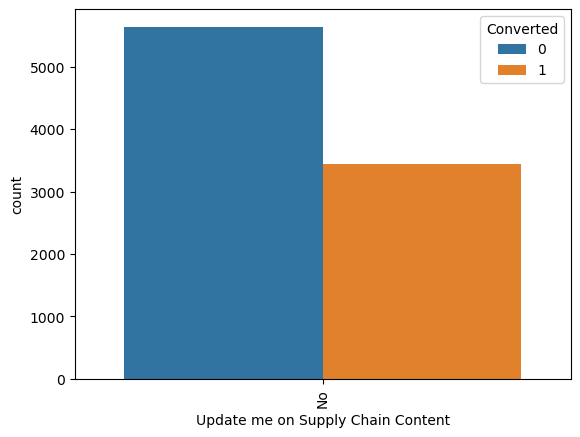

In [100]:
#Considering 'Update me on Supply Chain Content' column
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead)
plt.xticks(rotation = 90)

In [101]:
lead["Update me on Supply Chain Content"].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

### Inference - 
All the entries have response as 'No', hence no inference can be made from this column.

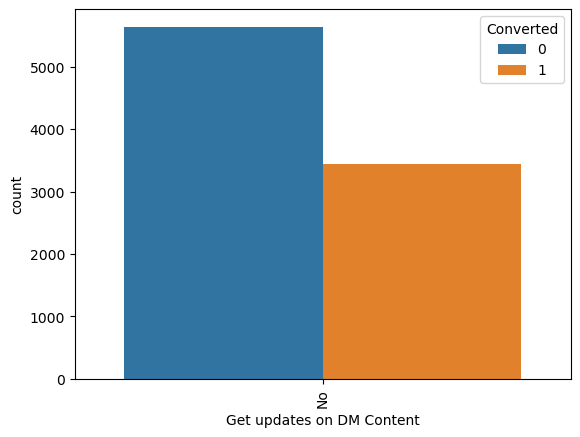

In [102]:
#Considering 'Get updates on DM Content' column
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [103]:
lead["Get updates on DM Content"].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

### Inference - 
All the entries have response as 'No', hence no inference can be made from this column.

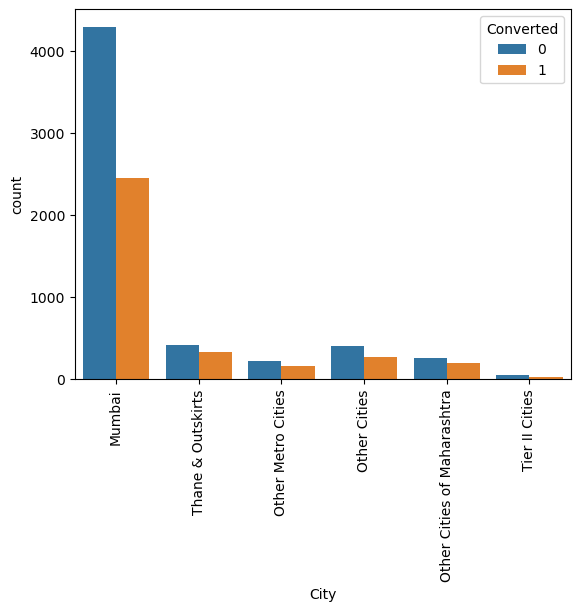

In [104]:
#Considering 'City' column
sns.countplot(x = "City", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [105]:
lead["City"].value_counts(normalize=True)

Mumbai                         0.744104
Thane & Outskirts              0.082103
Other Cities                   0.074939
Other Cities of Maharashtra    0.049151
Other Metro Cities             0.041547
Tier II Cities                 0.008155
Name: City, dtype: float64

In [106]:
lead.groupby('City')['Converted'].mean() * 100

City
Mumbai                         36.374408
Other Cities                   40.000000
Other Cities of Maharashtra    43.946188
Other Metro Cities             40.848806
Thane & Outskirts              44.563758
Tier II Cities                 33.783784
Name: Converted, dtype: float64

### Inference - 
Most responses are from Mumbai( considering Thane and other cities in Maharastra), around 85%. Conver
Conversion rate is around 36%

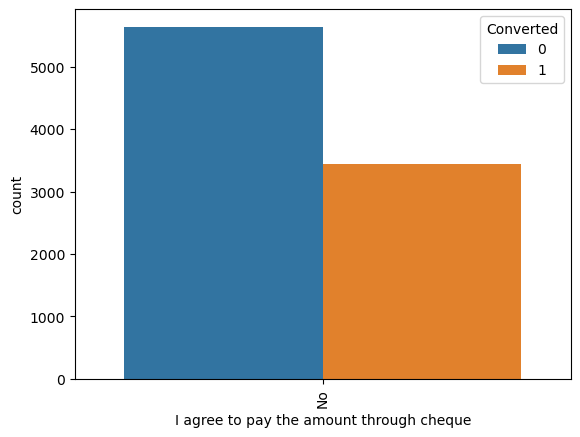

In [107]:
#Considering 'I agree to pay the amount through cheque' column
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [108]:
lead["I agree to pay the amount through cheque"].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

### Inference - 
All the entries have response as 'No', hence no inference can be made from this column.

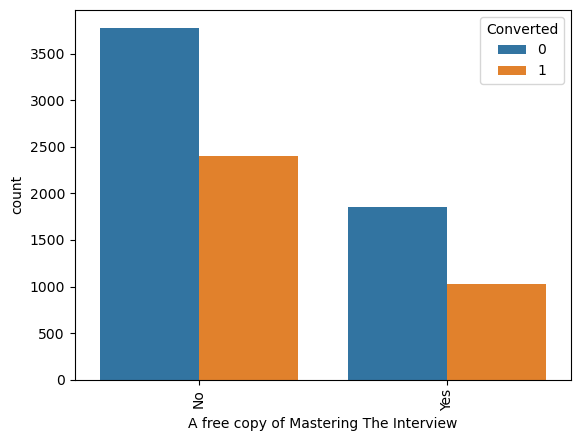

In [109]:
#Considering 'A free copy of Mastering The Interview' column
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [110]:
lead["A free copy of Mastering The Interview"].value_counts(normalize=True)

No     0.681728
Yes    0.318272
Name: A free copy of Mastering The Interview, dtype: float64

In [111]:
lead.groupby('A free copy of Mastering The Interview')['Converted'].mean() * 100

A free copy of Mastering The Interview
No     38.878112
Yes    35.664820
Name: Converted, dtype: float64

### Inference -
1. Most responses are No i.e 68% ,but the conversion rate is around 38%
2. No Inference can be made from this column.

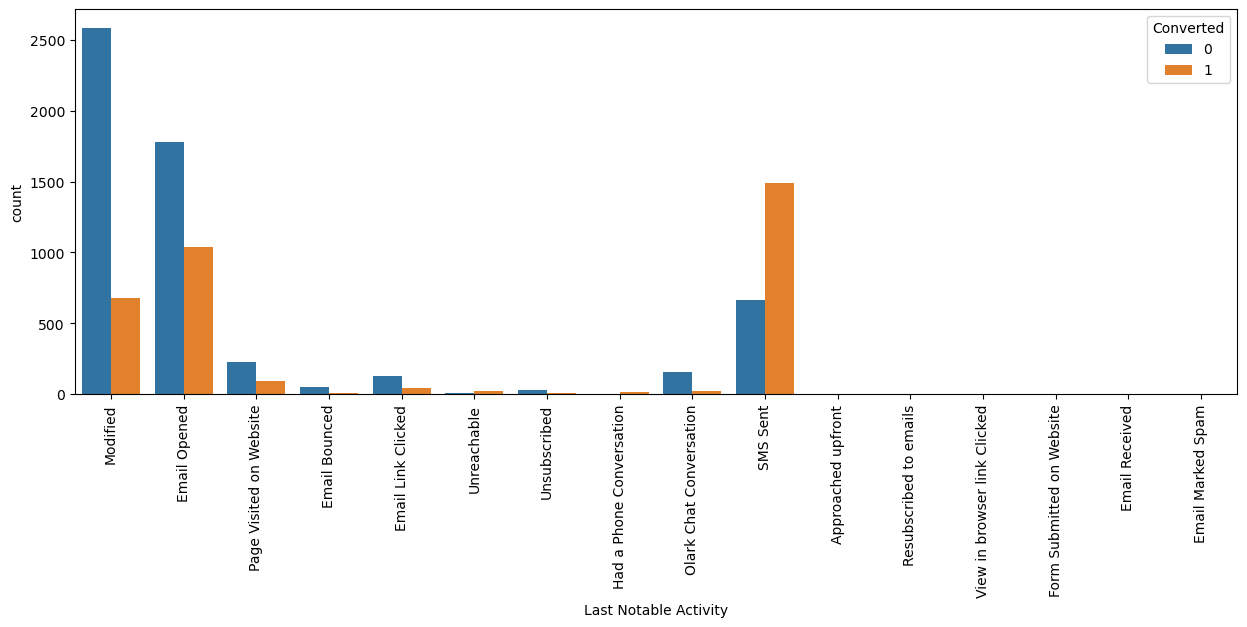

In [112]:
#Considering 'Last Notable Activity' column
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [113]:
lead["Last Notable Activity"].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [114]:
lead.groupby('Last Notable Activity')['Converted'].mean() * 100

Last Notable Activity
Approached upfront              100.000000
Email Bounced                    15.000000
Email Link Clicked               26.011561
Email Marked Spam               100.000000
Email Opened                     36.911087
Email Received                  100.000000
Form Submitted on Website         0.000000
Had a Phone Conversation         92.857143
Modified                         20.814203
Olark Chat Conversation          13.661202
Page Visited on Website          29.245283
Resubscribed to emails          100.000000
SMS Sent                         69.191450
Unreachable                      68.750000
Unsubscribed                     26.666667
View in browser link Clicked      0.000000
Name: Converted, dtype: float64

### Inference - 
The most common last notable activity is Modified, followed by Email Opened and SMS Sent.

In [115]:
#Based on the univariate analysis, there are many columns which are not adding any information to the model, hence we can drop them for further analysis
lead = lead.drop(['Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [116]:
lead.shape

(9074, 13)

In [117]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Do Not Call                      9074 non-null   object 
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  City                             9074 non-null   object 
 12  Last Notable Activit

## Model Making - Data Preparation

### Converting Binary Columns(Yes/No) to 0/1

In [118]:
bin_cols =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead[bin_cols] = lead[bin_cols].apply(binary_map)

### Creating Dummy Variables for Categorical Variables
1.Lead Origin

2.Lead Source

3.Last activity

4.Specialization

5.What is your current occupation

6.City

7.Last Notable Activity

In [119]:
Dummy_Vars = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
Dummy_Vars.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [120]:
Dummy_Vars.shape

(9074, 64)

In [121]:
# Concatenating the dummy_data to the lead_data dataframe
lead = pd.concat([lead, Dummy_Vars], axis=1)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [122]:
#Dropping the columns for which dummies were created
lead = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [123]:
lead.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [124]:
lead.shape

(9074, 70)

### Spitting the Data into Test and Train set

In [125]:
# Putting feature variable to leadX
leadX = lead.drop("Converted", axis=1)
leadX.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [126]:
#Putting Target variable to leadY
leadY = lead["Converted"]
leadY.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [127]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(leadX, leadY, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the Features

In [128]:
# Scaling Features
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [129]:
# Checking the lead conversion Rate
Converted=(sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

37.85541106458012

#### Currently we have 38% lead conversion rate.

### Feature Selection using RFE

In [130]:
logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select = 20) # executing RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [131]:
rfe

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [132]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False])

In [133]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 9),
 ('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 20),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 24),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Others', False, 28),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 48),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 19),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 35),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 

#### Created a list of tuples containing the names of the features in the X_train dataframe, a boolean value indicating whether each feature was selected by the RFE algorithm, and what is the rank of each feature according to the RFE algorithm. This is useful for inspecting the results of the RFE algorithm and identifying which features were selected or eliminated based on their rankings.

In [134]:
# Columns selected by the RFE algorithm
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

### Model Building - Assessing the Model using Statsmodels

### Model 1

In [135]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.3
Date:                Tue, 18 Jul 2023   Deviance:                       5180.6
Time:                        16:28:20   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8338      0.637      1.309      0.190      -0.414       2.082
Do Not Email                                            -1.6759      0.191     -8.796      0.000      -2.049      -1.302
Total Time Spent on Website                              1.1081      0.041     27.194      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1219      0.130     -8.663      0.000      -1.376      -0.868
Lead Origin_Lead Add Form                                1.6019      0.915      1.751      0.080      -0.191       3.395
Lead Origin_Lead Import                                  0.9059      0.480      1.888      0.059      -0.035       1.846
Lead Source_Olark Chat                                   1.1250      0.124      9.082      0.000       0.882       1.368
Lead Source_Reference                                    1.7697      0.938      1.887      0.059      -0.069       3.608
Lead Source_Welingak Website                             4.2961      1.165      3.687      0.000       2.012       6.580
Last Activity_Olark Chat Conversation                   -0.9504      0.172     -5.531      0.000      -1.287      -0.614
Last Activity_Other_Activity                             1.8717      0.537      3.483      0.000       0.818       2.925
Last Activity_SMS Sent                                   1.3454      0.076     17.766      0.000       1.197       1.494
Last Activity_Unsubscribed                               1.4083      0.483      2.917      0.004       0.462       2.355
Specialization_Others                                   -1.1410      0.126     -9.052      0.000      -1.388      -0.894
What is your current occupation_Housewife               21.7588   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Student                 -0.5518      0.673     -0.820      0.412      -1.871       0.767
What is your current occupation_Unemployed              -1.0059      0.634     -1.587      0.113      -2.248       0.236
What is your current occupation_Working Professional     1.6281      0.660      2.466      0.014       0.334       2.922
Last Notable Activity_Had a Phone Conversation           1.4204      1.223      1.161      0.246      -0.978       3.818
Last Notable Activity_Modified                          -0.8675      0.082    -10.620      0.000      -1.028      -0.707
Last Notable Activity_Unreachable                        1.5785      0.476      3.316      0.001       0.645       2.512
========================================================================================================================
"""

### Observation - 
Pvalue of 'What is your current occupation_Housewife' is very high(>0.05). so we need to drop this column.

In [136]:
cols = cols.drop('What is your current occupation_Housewife')

### Model 2

In [137]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.3
Date:                Tue, 18 Jul 2023   Deviance:                       5184.5
Time:                        16:28:21   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3160      0.590      2.230      0.026       0.159       2.473
Do Not Email                                            -1.6800      0.191     -8.812      0.000      -2.054      -1.306
Total Time Spent on Website                              1.1069      0.041     27.184      0.000       1.027       1.187
Lead Origin_Landing Page Submission                     -1.1154      0.129     -8.621      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6044      0.915      1.754      0.079      -0.189       3.397
Lead Origin_Lead Import                                  0.9081      0.480      1.893      0.058      -0.032       1.848
Lead Source_Olark Chat                                   1.1254      0.124      9.085      0.000       0.883       1.368
Lead Source_Reference                                    1.7729      0.938      1.890      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2952      1.165      3.685      0.000       2.011       6.579
Last Activity_Olark Chat Conversation                   -0.9512      0.172     -5.531      0.000      -1.288      -0.614
Last Activity_Other_Activity                             1.8733      0.537      3.486      0.000       0.820       2.927
Last Activity_SMS Sent                                   1.3445      0.076     17.756      0.000       1.196       1.493
Last Activity_Unsubscribed                               1.4117      0.483      2.924      0.003       0.466       2.358
Specialization_Others                                   -1.1373      0.126     -9.031      0.000      -1.384      -0.890
What is your current occupation_Student                 -1.0384      0.627     -1.656      0.098      -2.268       0.191
What is your current occupation_Unemployed              -1.4919      0.585     -2.550      0.011      -2.638      -0.345
What is your current occupation_Working Professional     1.1419      0.613      1.862      0.063      -0.060       2.344
Last Notable Activity_Had a Phone Conversation           1.4165      1.223      1.158      0.247      -0.981       3.814
Last Notable Activity_Modified                          -0.8703      0.082    -10.657      0.000      -1.030      -0.710
Last Notable Activity_Unreachable                        1.5745      0.476      3.305      0.001       0.641       2.508
========================================================================================================================
"""

### Observation - 
Pvalue for "What is your current occupation_Student" is very high(>0.05), so we need to drop this column.

In [138]:
cols = cols.drop('What is your current occupation_Student')

### Model 3

In [139]:
X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.7
Date:                Tue, 18 Jul 2023   Deviance:                       5187.4
Time:                        16:28:21   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4033
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4375      0.240      1.822      0.068      -0.033       0.908
Do Not Email                                            -1.6764      0.190     -8.804      0.000      -2.050      -1.303
Total Time Spent on Website                              1.1077      0.041     27.210      0.000       1.028       1.187
Lead Origin_Landing Page Submission                     -1.1285      0.129     -8.739      0.000      -1.382      -0.875
Lead Origin_Lead Add Form                                1.5983      0.914      1.748      0.080      -0.194       3.391
Lead Origin_Lead Import                                  0.9009      0.480      1.877      0.061      -0.040       1.842
Lead Source_Olark Chat                                   1.1202      0.124      9.050      0.000       0.878       1.363
Lead Source_Reference                                    1.7794      0.938      1.898      0.058      -0.058       3.617
Lead Source_Welingak Website                             4.2997      1.165      3.690      0.000       2.016       6.583
Last Activity_Olark Chat Conversation                   -0.9528      0.172     -5.546      0.000      -1.290      -0.616
Last Activity_Other_Activity                             1.8717      0.538      3.482      0.000       0.818       2.925
Last Activity_SMS Sent                                   1.3431      0.076     17.734      0.000       1.195       1.492
Last Activity_Unsubscribed                               1.4076      0.483      2.916      0.004       0.461       2.354
Specialization_Others                                   -1.1494      0.126     -9.138      0.000      -1.396      -0.903
What is your current occupation_Unemployed              -0.6011      0.213     -2.823      0.005      -1.019      -0.184
What is your current occupation_Working Professional     2.0313      0.283      7.172      0.000       1.476       2.586
Last Notable Activity_Had a Phone Conversation           1.4174      1.224      1.158      0.247      -0.981       3.816
Last Notable Activity_Modified                          -0.8676      0.082    -10.632      0.000      -1.028      -0.708
Last Notable Activity_Unreachable                        1.5799      0.475      3.323      0.001       0.648       2.512
========================================================================================================================
"""

### Observation - 
Pvalue of 'Last Notable Activity_Had a Phone Conversation' is very high(>0.05), so we need to drop this column.

In [140]:
cols = cols.drop('Last Notable Activity_Had a Phone Conversation')

### Model 4

In [141]:
X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.5
Date:                Tue, 18 Jul 2023   Deviance:                       5189.0
Time:                        16:28:22   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4031
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4409      0.240      1.836      0.066      -0.030       0.912
Do Not Email                                            -1.6789      0.191     -8.807      0.000      -2.053      -1.305
Total Time Spent on Website                              1.1067      0.041     27.196      0.000       1.027       1.186
Lead Origin_Landing Page Submission                     -1.1290      0.129     -8.745      0.000      -1.382      -0.876
Lead Origin_Lead Add Form                                1.5974      0.914      1.747      0.081      -0.195       3.390
Lead Origin_Lead Import                                  0.8993      0.480      1.874      0.061      -0.041       1.840
Lead Source_Olark Chat                                   1.1178      0.124      9.029      0.000       0.875       1.360
Lead Source_Reference                                    1.7790      0.938      1.897      0.058      -0.059       3.617
Lead Source_Welingak Website                             4.3023      1.165      3.693      0.000       2.019       6.586
Last Activity_Olark Chat Conversation                   -0.9478      0.172     -5.518      0.000      -1.284      -0.611
Last Activity_Other_Activity                             2.2295      0.463      4.816      0.000       1.322       3.137
Last Activity_SMS Sent                                   1.3427      0.076     17.728      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4093      0.483      2.919      0.004       0.463       2.356
Specialization_Others                                   -1.1534      0.126     -9.171      0.000      -1.400      -0.907
What is your current occupation_Unemployed              -0.6003      0.213     -2.818      0.005      -1.018      -0.183
What is your current occupation_Working Professional     2.0282      0.283      7.161      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8740      0.081    -10.725      0.000      -1.034      -0.714
Last Notable Activity_Unreachable                        1.5774      0.475      3.318      0.001       0.646       2.509
========================================================================================================================
"""

### Observation -
Pvalue of 'Lead Origin_Lead Add Form' is high(>0.05), so we need to drop this column.

In [142]:
cols = cols.drop('Lead Origin_Lead Add Form')

### Model 5

In [143]:
X_train_sm = sm.add_constant(X_train[cols])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.2
Date:                Tue, 18 Jul 2023   Deviance:                       5192.3
Time:                        16:28:24   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4028
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4578      0.240      1.907      0.056      -0.013       0.928
Do Not Email                                            -1.6806      0.191     -8.816      0.000      -2.054      -1.307
Total Time Spent on Website                              1.1047      0.041     27.190      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1473      0.129     -8.907      0.000      -1.400      -0.895
Lead Origin_Lead Import                                  0.8826      0.480      1.838      0.066      -0.059       1.824
Lead Source_Olark Chat                                   1.1108      0.124      8.993      0.000       0.869       1.353
Lead Source_Reference                                    3.3614      0.243     13.840      0.000       2.885       3.837
Lead Source_Welingak Website                             5.8902      0.730      8.073      0.000       4.460       7.320
Last Activity_Olark Chat Conversation                   -0.9522      0.172     -5.544      0.000      -1.289      -0.616
Last Activity_Other_Activity                             2.2254      0.463      4.808      0.000       1.318       3.133
Last Activity_SMS Sent                                   1.3427      0.076     17.732      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4077      0.483      2.916      0.004       0.462       2.354
Specialization_Others                                   -1.1652      0.126     -9.273      0.000      -1.411      -0.919
What is your current occupation_Unemployed              -0.5974      0.213     -2.804      0.005      -1.015      -0.180
What is your current occupation_Working Professional     2.0280      0.283      7.158      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8745      0.081    -10.736      0.000      -1.034      -0.715
Last Notable Activity_Unreachable                        1.5728      0.475      3.308      0.001       0.641       2.505
========================================================================================================================
"""

#### Checking the VIF Values

In [144]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,9.72
2,Lead Origin_Landing Page Submission,5.74
11,Specialization_Others,3.99
4,Lead Source_Olark Chat,2.24
14,Last Notable Activity_Modified,1.86
13,What is your current occupation_Working Profes...,1.66
9,Last Activity_SMS Sent,1.63
7,Last Activity_Olark Chat Conversation,1.59
5,Lead Source_Reference,1.46
1,Total Time Spent on Website,1.32


In [145]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF 9.72
cols = cols.drop('What is your current occupation_Unemployed')

### Model 6

In [146]:
X_train_sm = sm.add_constant(X_train[cols])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.0
Date:                Tue, 18 Jul 2023   Deviance:                       5200.0
Time:                        16:28:26   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4021
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1106      0.127     -0.868      0.385      -0.361       0.139
Do Not Email                                            -1.6767      0.191     -8.786      0.000      -2.051      -1.303
Total Time Spent on Website                              1.1047      0.041     27.207      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1519      0.129     -8.935      0.000      -1.405      -0.899
Lead Origin_Lead Import                                  0.8640      0.480      1.799      0.072      -0.077       1.805
Lead Source_Olark Chat                                   1.1164      0.124      9.037      0.000       0.874       1.359
Lead Source_Reference                                    3.3731      0.243     13.906      0.000       2.898       3.848
Lead Source_Welingak Website                             5.8819      0.730      8.063      0.000       4.452       7.312
Last Activity_Olark Chat Conversation                   -0.9437      0.172     -5.502      0.000      -1.280      -0.608
Last Activity_Other_Activity                             2.2075      0.463      4.767      0.000       1.300       3.115
Last Activity_SMS Sent                                   1.3276      0.075     17.609      0.000       1.180       1.475
Last Activity_Unsubscribed                               1.3822      0.483      2.863      0.004       0.436       2.328
Specialization_Others                                   -1.1774      0.126     -9.356      0.000      -1.424      -0.931
What is your current occupation_Working Professional     2.6063      0.195     13.382      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8814      0.081    -10.826      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5571      0.474      3.284      0.001       0.628       2.486
========================================================================================================================
"""

### Observation -
Pvalue of 'Lead Origin_Lead Import' is high(>0.05), so we need to drop this column.

In [147]:
cols = cols.drop('Lead Origin_Lead Import')

### Model 7

In [148]:
X_train_sm = sm.add_constant(X_train[cols])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.5
Date:                Tue, 18 Jul 2023   Deviance:                       5203.0
Time:                        16:28:28   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0717      0.126     -0.570      0.569      -0.318       0.175
Do Not Email                                            -1.6783      0.191     -8.798      0.000      -2.052      -1.304
Total Time Spent on Website                              1.0976      0.040     27.211      0.000       1.019       1.177
Lead Origin_Landing Page Submission                     -1.1863      0.128     -9.291      0.000      -1.437      -0.936
Lead Source_Olark Chat                                   1.0915      0.123      8.905      0.000       0.851       1.332
Lead Source_Reference                                    3.3401      0.242     13.812      0.000       2.866       3.814
Lead Source_Welingak Website                             5.8588      0.729      8.033      0.000       4.429       7.288
Last Activity_Olark Chat Conversation                   -0.9485      0.171     -5.531      0.000      -1.285      -0.612
Last Activity_Other_Activity                             2.1988      0.463      4.752      0.000       1.292       3.106
Last Activity_SMS Sent                                   1.3250      0.075     17.587      0.000       1.177       1.473
Last Activity_Unsubscribed                               1.3784      0.482      2.858      0.004       0.433       2.324
Specialization_Others                                   -1.1983      0.126     -9.536      0.000      -1.445      -0.952
What is your current occupation_Working Professional     2.6064      0.195     13.389      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8816      0.081    -10.833      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5470      0.474      3.264      0.001       0.618       2.476
========================================================================================================================
"""

### Checking for VIF values

In [149]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
12,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
11,What is your current occupation_Working Profes...,1.19


In [150]:
# Dropping the column  'Last Activity_Unsubscribed' to reduce the variables
cols = cols.drop('Last Activity_Unsubscribed')

### Model 8

In [151]:
X_train_sm = sm.add_constant(X_train[cols])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm8.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.1
Date:                Tue, 18 Jul 2023   Deviance:                       5210.2
Time:                        16:28:29   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4011
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0616      0.126     -0.490      0.624      -0.308       0.185
Do Not Email                                            -1.5192      0.177     -8.594      0.000      -1.866      -1.173
Total Time Spent on Website                              1.0988      0.040     27.251      0.000       1.020       1.178
Lead Origin_Landing Page Submission                     -1.1893      0.128     -9.313      0.000      -1.440      -0.939
Lead Source_Olark Chat                                   1.0922      0.123      8.915      0.000       0.852       1.332
Lead Source_Reference                                    3.3284      0.241     13.787      0.000       2.855       3.802
Lead Source_Welingak Website                             5.8242      0.728      7.999      0.000       4.397       7.251
Last Activity_Olark Chat Conversation                   -0.9545      0.171     -5.568      0.000      -1.290      -0.619
Last Activity_Other_Activity                             2.1869      0.463      4.725      0.000       1.280       3.094
Last Activity_SMS Sent                                   1.3094      0.075     17.459      0.000       1.162       1.456
Specialization_Others                                   -1.1991      0.126     -9.547      0.000      -1.445      -0.953
What is your current occupation_Working Professional     2.6072      0.194     13.433      0.000       2.227       2.988
Last Notable Activity_Modified                          -0.8886      0.081    -10.930      0.000      -1.048      -0.729
Last Notable Activity_Unreachable                        1.5360      0.473      3.245      0.001       0.608       2.464
========================================================================================================================
"""

#### Checking for VIF values

In [152]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.13


In [153]:
# Dropping the column  'Last Notable Activity_Unreachable' to reduce the variables
cols = cols.drop('Last Notable Activity_Unreachable')

### Model 9

In [154]:
X_train_sm = sm.add_constant(X_train[cols])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm9.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.5
Date:                Tue, 18 Jul 2023   Deviance:                       5221.0
Time:                        16:28:30   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0376      0.125     -0.300      0.764      -0.283       0.208
Do Not Email                                            -1.5218      0.177     -8.611      0.000      -1.868      -1.175
Total Time Spent on Website                              1.0954      0.040     27.225      0.000       1.017       1.174
Lead Origin_Landing Page Submission                     -1.1940      0.128     -9.360      0.000      -1.444      -0.944
Lead Source_Olark Chat                                   1.0819      0.122      8.847      0.000       0.842       1.322
Lead Source_Reference                                    3.3166      0.241     13.747      0.000       2.844       3.789
Lead Source_Welingak Website                             5.8115      0.728      7.981      0.000       4.384       7.239
Last Activity_Olark Chat Conversation                   -0.9613      0.171     -5.610      0.000      -1.297      -0.625
Last Activity_Other_Activity                             2.1751      0.463      4.699      0.000       1.268       3.082
Last Activity_SMS Sent                                   1.2942      0.075     17.308      0.000       1.148       1.441
Specialization_Others                                   -1.2025      0.125     -9.582      0.000      -1.448      -0.957
What is your current occupation_Working Professional     2.6083      0.194     13.454      0.000       2.228       2.988
Last Notable Activity_Modified                          -0.9004      0.081    -11.097      0.000      -1.059      -0.741
========================================================================================================================
"""

#### Checking for VIF values

In [155]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.16
3,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.69
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.56
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.13


In [156]:
cols.shape

(12,)

### Inference -
Pvalues of all variables is 0 and VIF values are low for all the variables, model9 is our final model. There are 12 variables considered in our final model.

### Prediction on the Train set

In [157]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

3009    0.196697
1012    0.125746
9226    0.323477
4750    0.865617
7987    0.797752
1281    0.744001
2880    0.100027
4971    0.965845
7536    0.854512
1248    0.768071
dtype: float64

In [158]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19669707, 0.12574636, 0.32347712, 0.86561739, 0.79775204,
       0.74400101, 0.10002735, 0.96584525, 0.85451189, 0.76807088])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [159]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.196697,3009
1,0,0.125746,1012
2,0,0.323477,9226
3,1,0.865617,4750
4,1,0.797752,7987


#### Using cut-off probability point as 0.5 to find the predicted labels, create a new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [160]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.196697,3009,0
1,0,0.125746,1012,0
2,0,0.323477,9226,0
3,1,0.865617,4750,1
4,1,0.797752,7987,1


### Confusion Matrix

In [161]:
# Calculating Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)


[[3461  444]
 [ 719 1727]]


In [162]:
## Interpretation is:

# The confusion matrix indicates as below


#      \Predicted   not_converted    converted
# Actual
# not_converted          3461      444
# converted              719       1727  

### Accuracy of the model

In [163]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8168792316170682


### Metrics beyond simply accuracy

In [164]:
#  TP- True Positives , TN - True Negatives , FP - False Positives, FN - False Negatives ]
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [165]:
# Sensitivity

print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7060506950122649


In [166]:
# Specificity

print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8862996158770806


In [167]:
# False Positivity Rate

print("False Positivity Rate :",FP/ float(TN+FP))

False Positivity Rate : 0.11370038412291933


In [168]:
# Positive Predictive Value 

print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7954859511745739


In [169]:
# Negative Predictive Value

print ("Negative Predictive Value :",TN / float(TN+ FN))

Negative Predictive Value : 0.8279904306220096


### Inference-
The specificity of the model was good (~88%) but the sensitivity of the model was only 70%, indicating that the model was better at identifying negative cases than positive cases.

The low sensitivity was mainly due to the arbitrary cut-off point of 0.5 that was chosen. To improve the sensitivity, the
cut-off point needed to be optimized using the ROC curve.

### Plotting ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [170]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [171]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

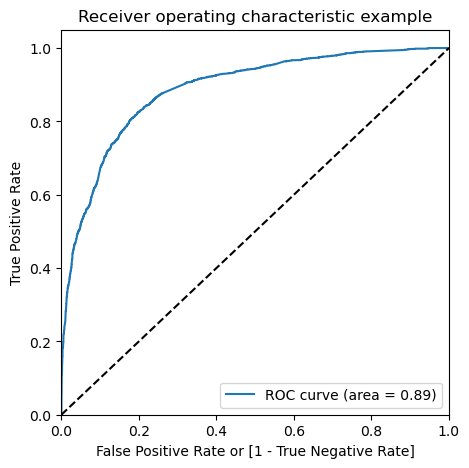

In [172]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### This model has an area under the ROC curve of 0.89, indicating that the model is good.

### Finding Optimal Cutoff Point
Above we had considered an arbitrary cut-off value of 0.5 to predict the labels. We need to determine the best cut-off value for improving the model performance. Optimal cutoff probability is the probability threshold to get balanced sensitivity and specificity

### Optimal Cutoff point

In [173]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0


In [174]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.586049  0.973426  0.343406
0.2   0.2  0.748386  0.916599  0.643022
0.3   0.3  0.801449  0.849959  0.771063
0.4   0.4  0.816564  0.772690  0.844046
0.5   0.5  0.816879  0.706051  0.886300
0.6   0.6  0.797040  0.600572  0.920102
0.7   0.7  0.786963  0.531889  0.946735
0.8   0.8  0.761297  0.424775  0.972087
0.9   0.9  0.720831  0.294767  0.987708


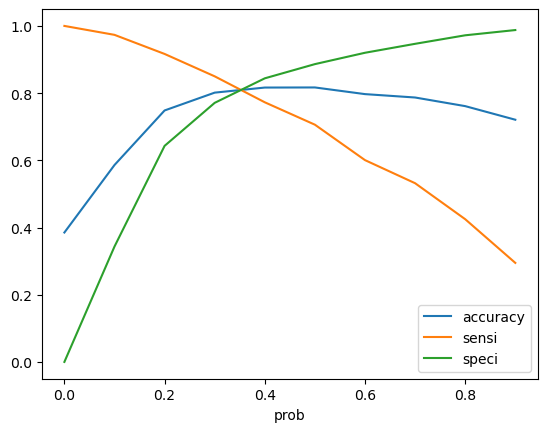

In [175]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the above curve, 0.34 is the optimal point to take it as a cutoff probability.

In [176]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [177]:
#Assigning Lead Score to the Training data
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0,13
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0,32
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1,80


### Model Evaluation

In [178]:
y_train_pred_final

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0,13
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0,32
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,0,0.184223,367,0,1,1,0,0,0,0,0,0,0,0,0,18
6347,1,0.935788,82,1,1,1,1,1,1,1,1,1,1,1,1,94
6348,0,0.916621,8199,1,1,1,1,1,1,1,1,1,1,1,1,92
6349,0,0.217132,7077,0,1,1,1,0,0,0,0,0,0,0,0,22


In [179]:
#overall Accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8108959219020627


In [180]:
# Confusion matrix
confusion_arr = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_arr

array([[3151,  754],
       [ 447, 1999]], dtype=int64)

In [181]:
TP = confusion_arr[1,1] # true positive 
TN = confusion_arr[0,0] # true negatives
FP = confusion_arr[0,1] # false positives
FN = confusion_arr[1,0] # false negatives

In [182]:
#sensitivity
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8172526573998364


In [183]:
#specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8069142125480153


In [184]:
#false postive rate
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.19308578745198463


In [185]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7261169633127498


In [186]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8757643135075042


### Precision and Recall
Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.

Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [187]:
#Checking confusion matrix once again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3461,  444],
       [ 719, 1727]], dtype=int64)

In [188]:
print("Precision : ",(TP/(TP+FP)))
print("Recall : ",(TP/(TP+FN)))

Precision :  0.7261169633127498
Recall :  0.8172526573998364


### Using sklearn utilities for the same

In [189]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7954859511745739


In [190]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.7060506950122649


### Precision and recall tradeoff

In [191]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [192]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

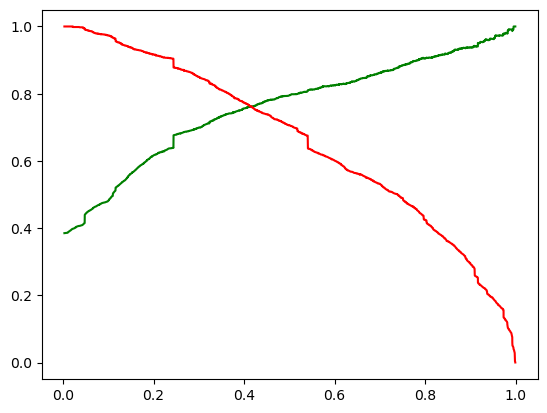

In [193]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Predictions on the Test Set

### Scaling the Test data

In [194]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [195]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified
3271,0,-0.600595,0,0,0,0,0,0,0,1,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,1,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,1
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0


In [196]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Predictions on the test set
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

3271    0.130342
1490    0.969057
7936    0.112570
4216    0.802999
3830    0.132924
1800    0.635544
6507    0.342648
4821    0.302742
4223    0.916621
4714    0.323477
dtype: float64

In [197]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.130342
1490,0.969057
7936,0.112570
4216,0.802999
3830,0.132924


In [198]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [199]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [200]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [201]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.130342
1,1,1490,0.969057
2,0,7936,0.112570
3,1,4216,0.802999
4,0,3830,0.132924


In [202]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [203]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.130342
1,1,1490,0.969057
2,0,7936,0.112570
3,1,4216,0.802999
4,0,3830,0.132924


In [204]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [205]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.130342
1,1490,1,0.969057
2,7936,0,0.112570
3,4216,1,0.802999
4,3830,0,0.132924


In [206]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [207]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.130342,0
1,1490,1,0.969057,1
2,7936,0,0.112570,0
3,4216,1,0.802999,1
4,3830,0,0.132924,0


In [208]:
#Overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8049944913698127


In [209]:
#confusion matrix
confusion_arr = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_arr

array([[1396,  338],
       [ 193,  796]], dtype=int64)

In [210]:
TP = confusion_arr[1,1] # true positive 
TN = confusion_arr[0,0] # true negatives
FP = confusion_arr[0,1] # false positives
FN = confusion_arr[1,0] # false negatives

In [211]:
print("Sensitivity :",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))

Sensitivity : 0.8048533872598584
Specificity : 0.8050749711649365


In [212]:
#Assigning Lead Score to the Testing data
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.130342,0,13
1,1490,1,0.969057,1,97
2,7936,0,0.112570,0,11
3,4216,1,0.802999,1,80
4,3830,0,0.132924,0,13


### Observations:
After running the model on the Test Data , we obtain:

Accuracy : 80.4 %

Sensitivity : 80.4 %

Specificity : 80.5 %

### Results :

### Comparing the values obtained for Train & Test:
Train Data:

Accuracy : 81.0 %

Sensitivity : 81.7 %

Specificity : 80.6 %

Test Data:

Accuracy : 80.4 %

Sensitivity : 80.4 %

Specificity : 80.5 %

we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

### Finding out the leads which should be contacted

#### The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [213]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.969057,1,97
8,4223,1,0.916621,1,92
16,1946,1,0.924467,1,92
21,2461,1,0.992551,1,99
23,5822,1,0.997991,1,100
...,...,...,...,...,...
2694,1566,1,0.947723,1,95
2699,6461,1,0.961562,1,96
2703,5741,1,0.908283,1,91
2715,6299,1,0.871977,1,87


In [214]:
#There are 368 leads which can be contacted and have a high chance of getting converted. 
#Prospect ID of the leads to be contacted are -
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 1518,
       4543, 4830, 4365, 3542, 2504, 7674, 8596, 4003, 4963, 6947, 4807,
        446,  789, 8372, 5805, 3758, 1561, 5367,  737, 6423, 8286, 7174,
       4461, 1436, 7552, 3932, 4080, 1475, 5785, 2860, 7253, 4297, 5490,
       1995, 4498, 5797, 8687,  831, 7653, 2018, 6743, 3976, 5769, 1051,
       1663, 3288, 8959, 7521, 8282, 8213, 9063, 5292, 6913, 1481,  785,
       3265, 3285, 7433, 3858, 3810, 2009, 8106,  373, 7417, 4179, 8568,
       7268, 6784, 6754, 7236, 2960, 7753, 3983,  802, 8745, 4717,  505,
       8509, 6094, 4992, 7036, 2680, 7065,  112, 6149, 7157, 7175, 1675,
       6999, 5826, 8492, 6499, 2481, 3439, 4612, 7129, 4793, 4837, 2495,
        822, 8111, 2378, 5075, 7699, 5638, 2342, 8077, 2727,  720, 7489,
       2961, 1542, 5656, 2630, 6728, 8205, 6332, 8461, 2427, 5087,  174,
       2674, 8065, 2095, 1568, 8597, 4865, 3535, 4708, 1304, 6066, 6538,
       5700, 1388, 5815, 7970, 7902, 5804, 7805, 50

In [215]:
#Finding out the Important Features from our final model
result.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.811465
Lead Source_Reference                                   3.316598
What is your current occupation_Working Professional    2.608292
Last Activity_Other_Activity                            2.175096
Last Activity_SMS Sent                                  1.294180
Total Time Spent on Website                             1.095412
Lead Source_Olark Chat                                  1.081908
const                                                  -0.037565
Last Notable Activity_Modified                         -0.900449
Last Activity_Olark Chat Conversation                  -0.961276
Lead Origin_Landing Page Submission                    -1.193957
Specialization_Others                                  -1.202474
Do Not Email                                           -1.521825
dtype: float64

## Recommendations:
1. The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.
2. The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.
3. The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.
4. The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.
5. The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.
6. The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.
7. The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.
8. The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.
9. The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.